In [82]:
import pandas as pd
import pickle

# Import the pre-processed dataset and its values mapping
data = pd.read_csv("./dataset_final.csv")
with open('label_mappings.pkl', 'rb') as f: label_mappings = pickle.load(f)

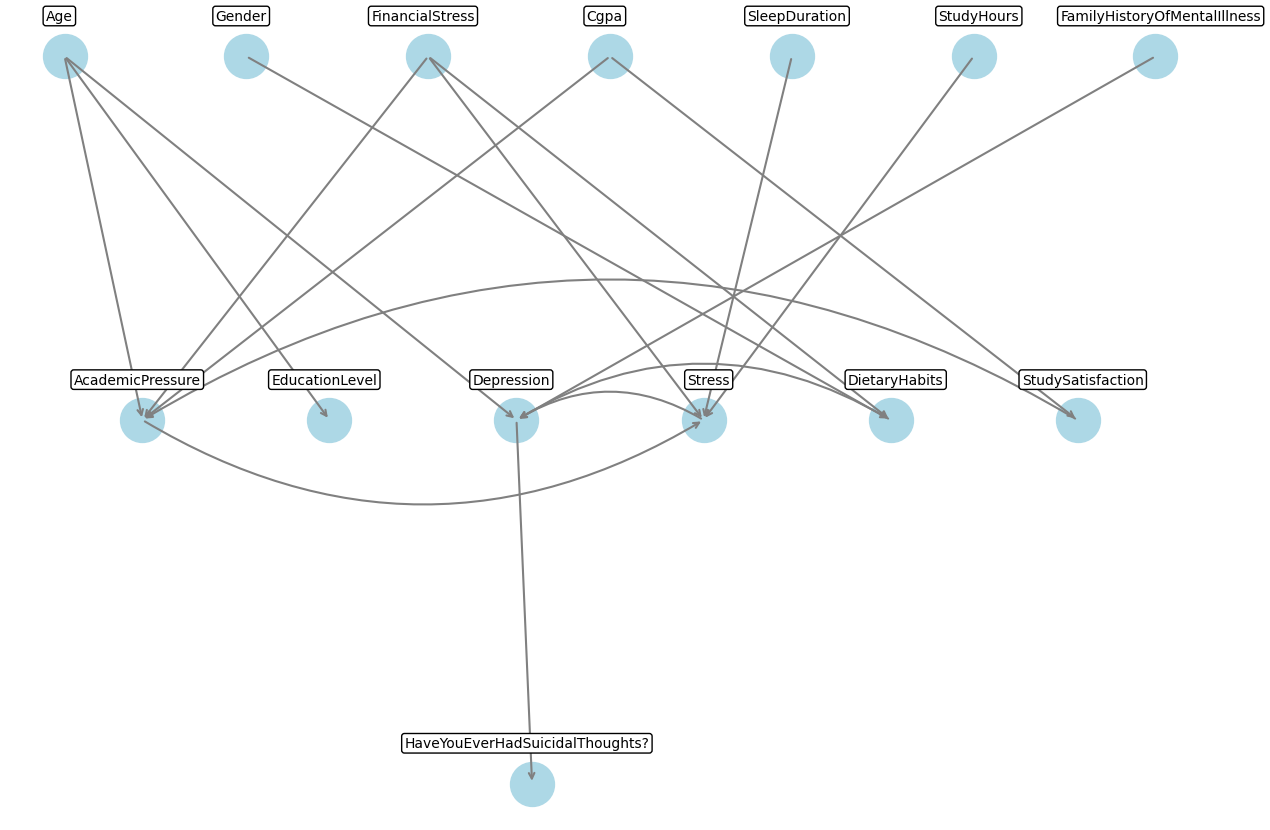

In [84]:
from pgmpy.models import BayesianNetwork
import networkx as nx
from utils import hierarchical_layout, draw_graph

# Network Giorgio with Stress
network_structure = [
    ("Age","AcademicPressure"),
    ("Age", "EducationLevel"),
    ("Age", "Depression"),
    ("Gender", "DietaryHabits"),
    ("FinancialStress", "AcademicPressure"),
    ("FinancialStress", "Stress"),
    ("FinancialStress", "DietaryHabits"),
    ("Cgpa", "StudySatisfaction"),
    ("Cgpa", "AcademicPressure"),
    ("StudySatisfaction", "AcademicPressure"),
    ("AcademicPressure", "Stress"),
    ("SleepDuration", "Stress"),
    ("StudyHours", "Stress"),
    ("Stress", "Depression"),
    ("DietaryHabits", "Depression"),
    ("FamilyHistoryOfMentalIllness", "Depression"),
    ("Depression", "HaveYouEverHadSuicidalThoughts?")
]

BN = BayesianNetwork(network_structure, latents=["Stress"])

# Plot its graph
G = nx.DiGraph()
G.add_edges_from(BN.edges())
pos = hierarchical_layout(G, horizontal_spacing=3.0)
draw_graph(G, pos)

In [85]:
nodes = sorted([n for n in BN.nodes()])
cols = sorted(data.columns.to_list())
if (nodes != cols) :
    print("Difference:", set(nodes)^set(cols))

Difference: {'Stress', 'Regions', 'EducationCategory'}


In [86]:
import numpy as np
data_new = data.drop(columns=["Regions", "EducationCategory"])

# data_new["Stress"] = 0  # the problem is here, what can we set?

nodes = sorted([n for n in BN.nodes()])
cols = sorted(data_new.columns.to_list())
if (nodes != cols) :
    print("Difference:", set(nodes)^set(cols))

Difference: {'Stress'}


In [87]:
from pgmpy.estimators import ExpectationMaximization

# Fit Bayesian Network using Expectation-Maximization
em = ExpectationMaximization(BN, data_new)
random_seed = 42
estimated_params = em.get_parameters(n_jobs=-1, seed=random_seed, max_iter=2)

  0%|          | 0/2 [00:00<?, ?it/s]

In [91]:
estimated_params

[<TabularCPD representing P(Age:4) at 0x13be38f10>,
 <TabularCPD representing P(AcademicPressure:6 | Age:4, FinancialStress:5, Cgpa:6, StudySatisfaction:6) at 0x13bdd5250>,
 <TabularCPD representing P(EducationLevel:5 | Age:4) at 0x13bdd4610>,
 <TabularCPD representing P(Depression:2 | Age:4, DietaryHabits:4, Stress:2, FamilyHistoryOfMentalIllness:2) at 0x13bbfff50>,
 <TabularCPD representing P(Gender:2) at 0x13bbfff90>,
 <TabularCPD representing P(DietaryHabits:4 | Gender:2, FinancialStress:5) at 0x13bbfde90>,
 <TabularCPD representing P(FinancialStress:5) at 0x13be6e210>,
 <TabularCPD representing P(Stress:2 | AcademicPressure:6, FinancialStress:5, SleepDuration:5, StudyHours:4) at 0x13be215d0>,
 <TabularCPD representing P(Cgpa:6) at 0x13be22410>,
 <TabularCPD representing P(StudySatisfaction:6 | Cgpa:6) at 0x13be21890>,
 <TabularCPD representing P(SleepDuration:5) at 0x13be22310>,
 <TabularCPD representing P(StudyHours:4) at 0x13b8475d0>,
 <TabularCPD representing P(FamilyHistoryOfM